<a href="https://colab.research.google.com/github/mayur11803/Mini-projects/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [2]:
#Step 2: Fetch Historical Stock Data
ticker = "AAPL"  # Replace with the desired stock symbol
start_date = "2020-01-01"
end_date = "2022-01-01"

stock_data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


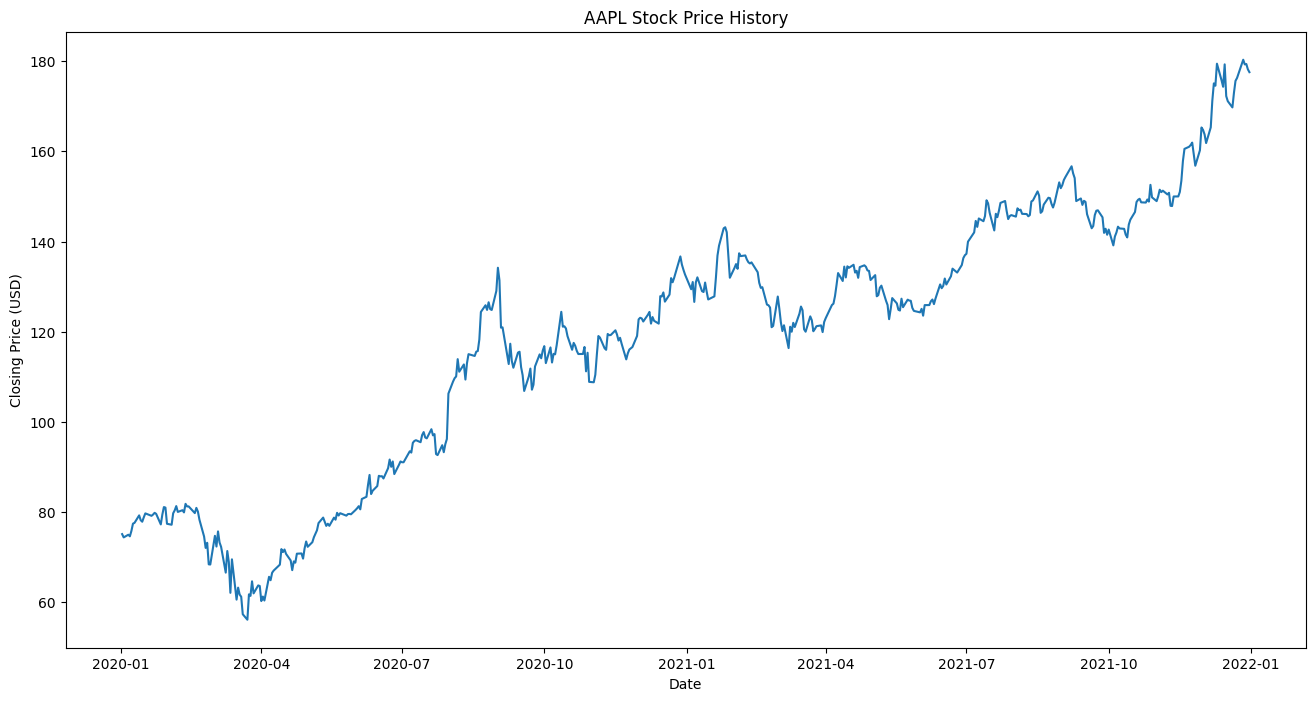

In [3]:
#Step 3: Explore and Visualize Data
plt.figure(figsize=(16, 8))
plt.title(f"{ticker} Stock Price History")
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.show()


In [4]:
#Step 4: Preprocess Data
data = stock_data.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [5]:
#Step 5: Create Training Data
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X, y = create_dataset(scaled_data, time_step)


In [6]:
#Step 6: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Step 7: Reshape Data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [8]:
#Step 8: Build and Train the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, verbose=1)


Epoch 1/50
6/6 [==============================] - 10s 547ms/step - loss: 0.2296 - val_loss: 0.0074
Epoch 2/50
6/6 [==============================] - 1s 181ms/step - loss: 0.0334 - val_loss: 0.0045
Epoch 3/50
6/6 [==============================] - 1s 189ms/step - loss: 0.0130 - val_loss: 0.0191
Epoch 4/50
6/6 [==============================] - 1s 192ms/step - loss: 0.0119 - val_loss: 0.0066
Epoch 5/50
6/6 [==============================] - 2s 300ms/step - loss: 0.0094 - val_loss: 0.0077
Epoch 6/50
6/6 [==============================] - 2s 405ms/step - loss: 0.0048 - val_loss: 0.0071
Epoch 7/50
6/6 [==============================] - 2s 258ms/step - loss: 0.0063 - val_loss: 0.0045
Epoch 8/50
6/6 [==============================] - 1s 181ms/step - loss: 0.0042 - val_loss: 0.0054
Epoch 9/50
6/6 [==============================] - 1s 165ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 10/50
6/6 [==============================] - 1s 180ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 11/50
6/6 [=

In [9]:
#Step 9: Evaluate the Model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


3/3 [==============================] - 0s 37ms/step


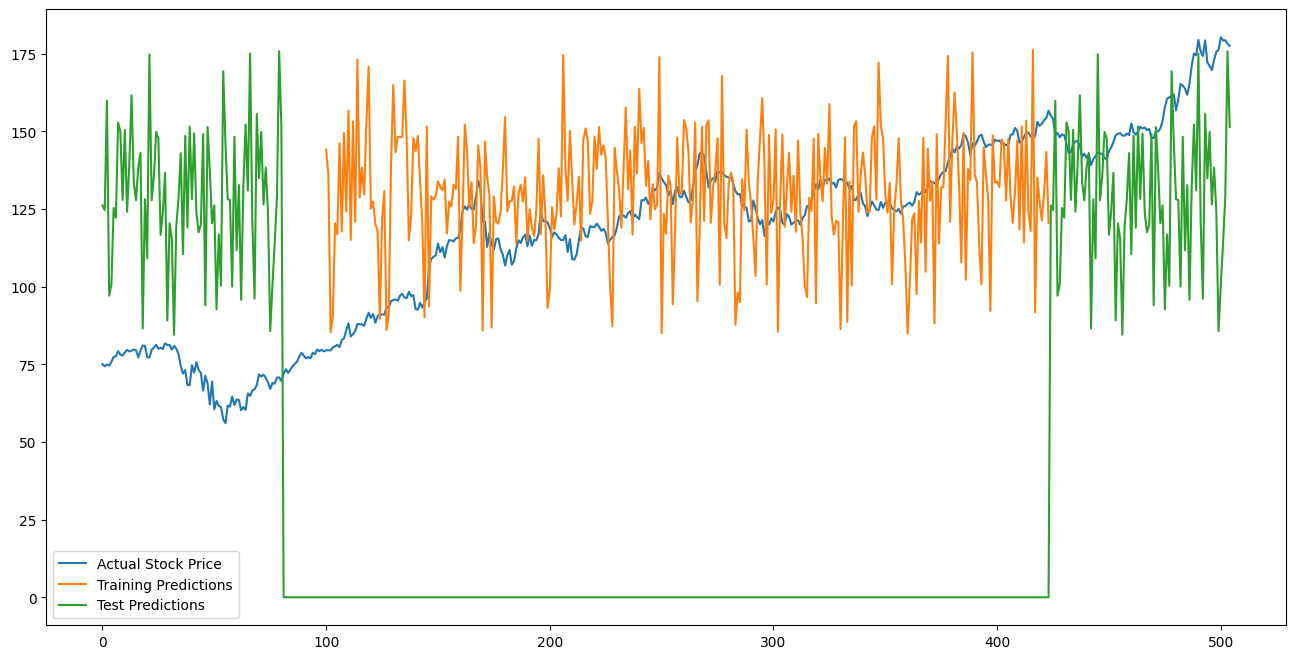

In [18]:
plt.figure(figsize=(16, 8))

# Plot training predictions
train_plot = np.empty_like(scaled_data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

# Plot test predictions

test_plot = np.zeros_like(scaled_data)
test_plot[:len(test_predict), :] = test_predict
test_plot = numpy.nan_to_num(test_plot)
test_plot[len(train_predict) + time_step:len(scaled_data), :] = test_predict

plt.plot(scaler.inverse_transform(scaled_data), label='Actual Stock Price')
plt.plot(train_plot, label='Training Predictions')
plt.plot(test_plot, label='Test Predictions')
plt.legend()
plt.show()